In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Pima%20Indians%20Diabetes%20Database/diabetes.csv")

In [3]:
print(f"Shape of dataset: {colored(df.shape, 'yellow')}")

Shape of dataset: (768, 9)


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df = df.rename(columns = {'DiabetesPedigreeFunction':'DPF'})

In [6]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DPF,517
Age,52
Outcome,2


In [7]:
con_cols = list(df.drop('Outcome',axis=1).columns)
target = ['Outcome']
print(f"The columns are : {colored(con_cols, 'yellow')}")
print(f"The target is   : {colored(target,'yellow')}")

The columns are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
The target is   : ['Outcome']


In [8]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [9]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

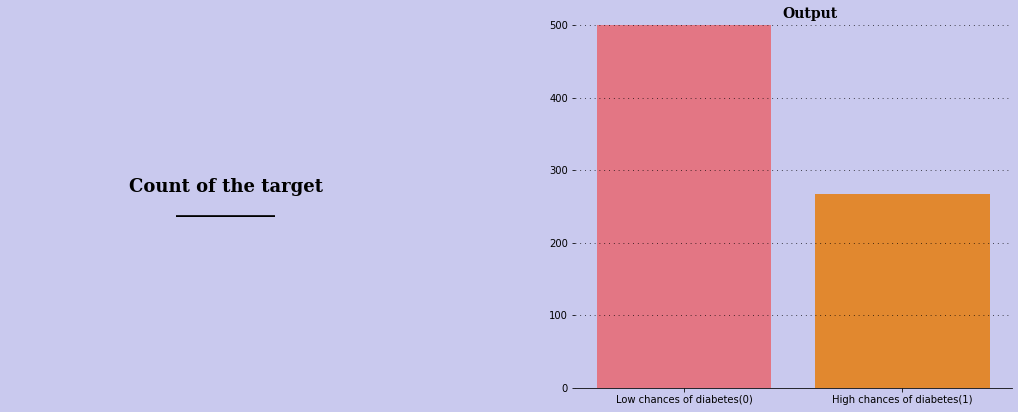

In [10]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#c9c9ee"
color_palette = ["#f56476","#ff8811","#001427","#6369d1","#f0f66e"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.45,510,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'Outcome',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of diabetes(0)","High chances of diabetes(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

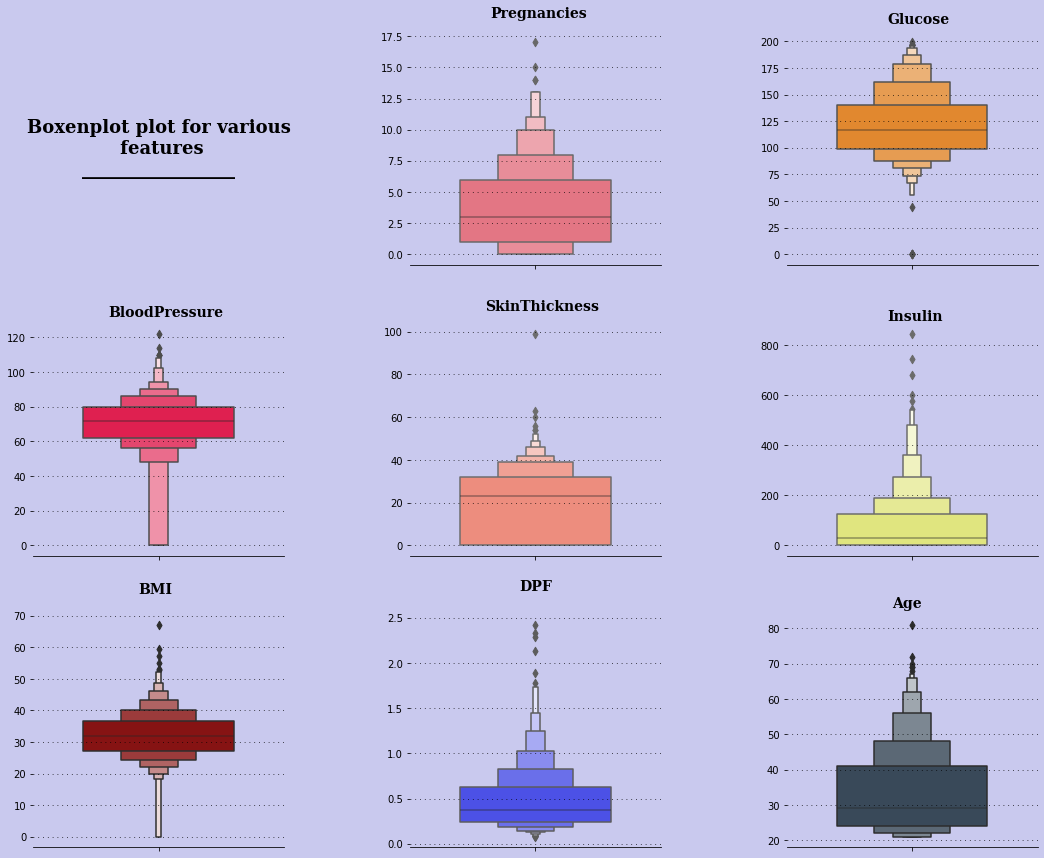

In [11]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
# c9c9ee
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxenplot plot for various\n features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies 
ax1.text(-0.18, 19, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Pregnancies'],palette=["#f56476"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose 
ax2.text(-0.1, 217, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['Glucose'],palette=["#ff8811"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure 
ax3.text(-0.20, 132, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['BloodPressure'],palette=["#ff0040"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness 
ax4.text(-.2, 110, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['SkinThickness'],palette=["#ff7f6c"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin 
ax5.text(-0.10, 900, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['Insulin'],palette=["#f0f66e"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI 
ax6.text(-0.08, 77, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,y=df['BMI'],palette=["#990000"],width=0.6)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DPF 
ax7.text(-0.065, 2.8, 'DPF', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,y=df['DPF'],palette=["#3339FF"],width=0.6)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age 
ax8.text(-0.08, 86, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,y=df['Age'],palette=["#34495E"],width=0.6)
ax8.set_xlabel("")
ax8.set_ylabel("")



for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

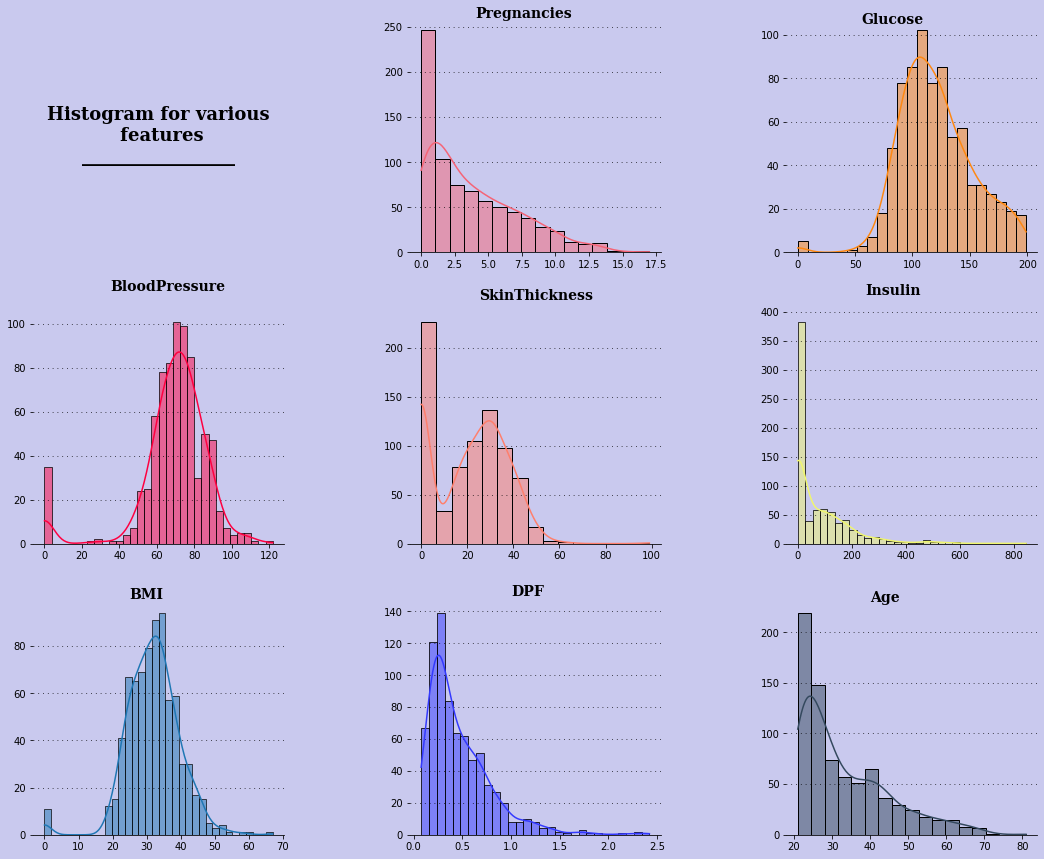

In [12]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
# c9c9ee
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Histogram for various\n features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies 
ax1.text(4, 260, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1,x=df['Pregnancies'],color="#f56476",kde=True)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose 
ax2.text(55, 105, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax2,x=df['Glucose'],color="#ff8811",kde=True)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure 
ax3.text(35, 115, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3,x=df['BloodPressure'],color="#ff0040",kde=True)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness 
ax4.text(25, 250, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax4,x=df['SkinThickness'],color="#ff7f6c",kde=True)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin 
ax5.text(250, 430, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax5,x=df['Insulin'],color="#f0f66e",kde=True)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI 
ax6.text(25, 100, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax6,x=df['BMI'],palette=["#990000"],kde=True)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DPF 
ax7.text(1, 150, 'DPF', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax7,x=df['DPF'],color="#3339FF",kde=True)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age 
ax8.text(40, 230, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax8,x=df['Age'],color="#34495E",kde=True)
ax8.set_xlabel("")
ax8.set_ylabel("")


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

In [13]:
df_corr = df.corr().transpose
df_corr

<bound method DataFrame.transpose of                Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.129459       0.141282      -0.081672 -0.073535   
Glucose           0.129459  1.000000       0.152590       0.057328  0.331357   
BloodPressure     0.141282  0.152590       1.000000       0.207371  0.088933   
SkinThickness    -0.081672  0.057328       0.207371       1.000000  0.436783   
Insulin          -0.073535  0.331357       0.088933       0.436783  1.000000   
BMI               0.017683  0.221071       0.281805       0.392573  0.197859   
DPF              -0.033523  0.137337       0.041265       0.183928  0.185071   
Age               0.544341  0.263514       0.239528      -0.113970 -0.042163   
Outcome           0.221898  0.466581       0.065068       0.074752  0.130548   

                    BMI       DPF       Age   Outcome  
Pregnancies    0.017683 -0.033523  0.544341  0.221898  
Glucose        0.221071  0.137337  0.263514  0.466

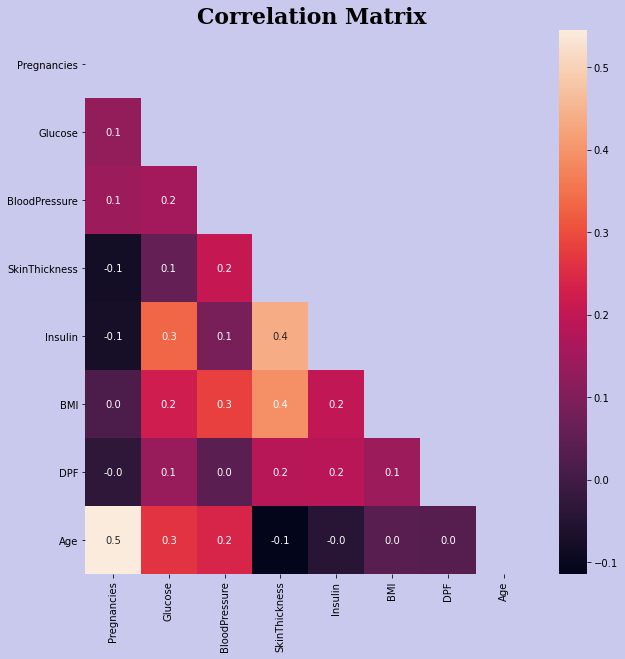

In [14]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

df_corr = df[con_cols].corr().transpose()
mask = np.triu(np.ones_like(df_corr))
ax0.text(2,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True)
plt.show()

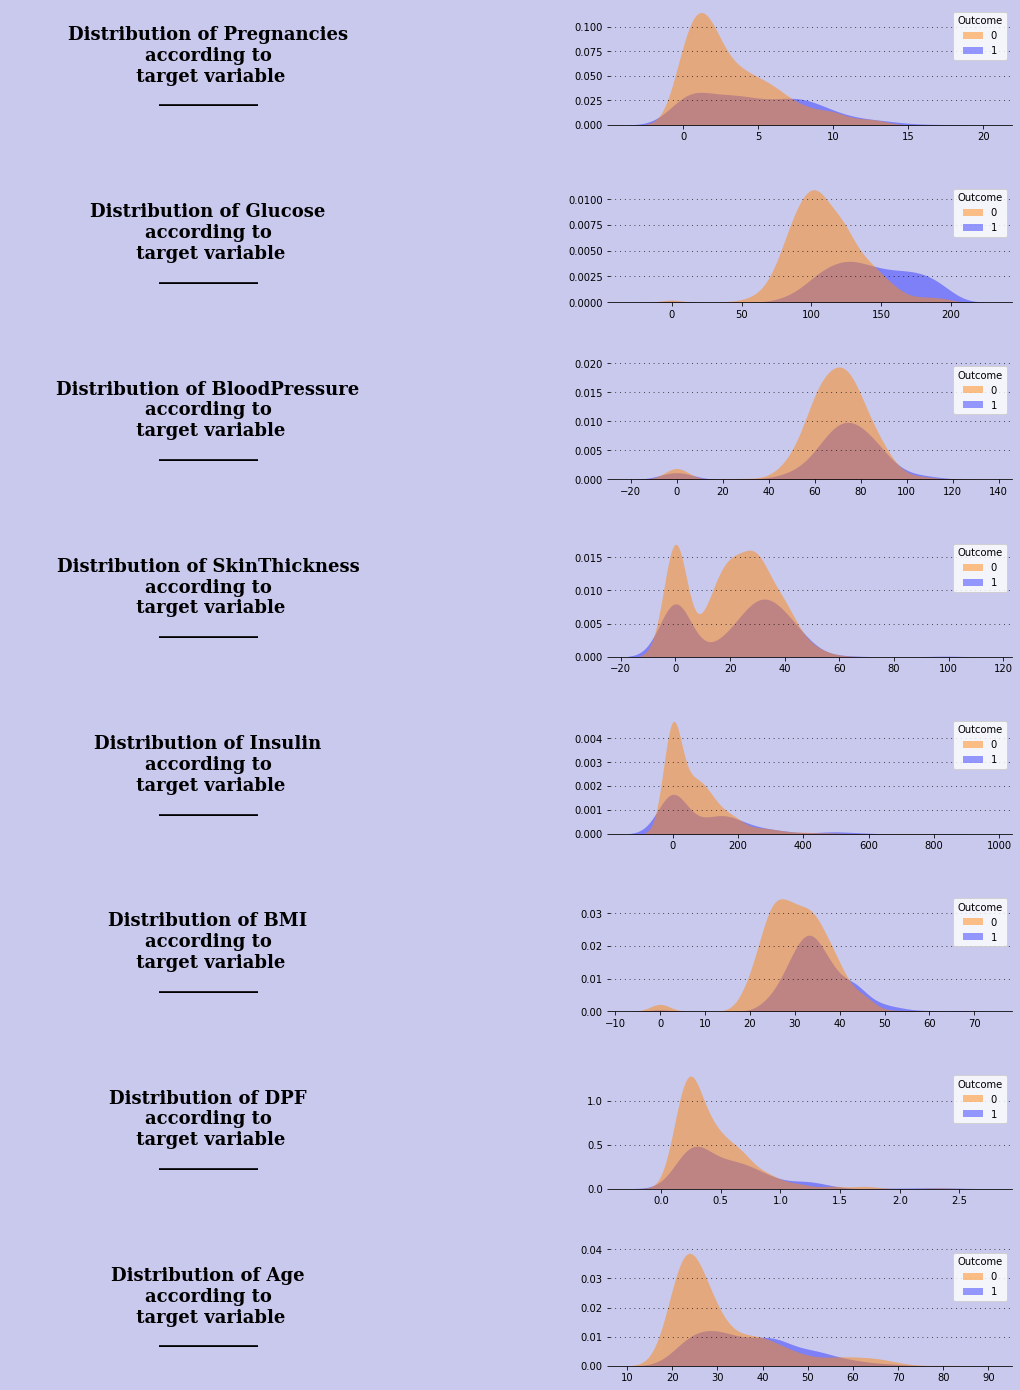

In [15]:
fig = plt.figure(figsize=(18,25))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])
ax12 = fig.add_subplot(gs[6,0])
ax13 = fig.add_subplot(gs[6,1])
ax14 = fig.add_subplot(gs[7,0])
ax15 = fig.add_subplot(gs[7,1])


background_color = "#c9c9ee"
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)
ax14.set_facecolor(background_color)
ax15.set_facecolor(background_color)

# Pregnancies title
ax0.text(0.5,0.5,"Distribution of Pregnancies\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Pregnancies
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='Pregnancies',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose title
ax2.text(0.5,0.5,"Distribution of Glucose\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Glucose
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='Glucose',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# BloodPressure title
ax4.text(0.5,0.5,"Distribution of BloodPressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# BloodPressure
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='BloodPressure',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# SkinThickness title
ax6.text(0.5,0.5,"Distribution of SkinThickness\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# SkinThickness
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='SkinThickness',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Insulin title
ax8.text(0.5,0.5,"Distribution of Insulin\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Insulin
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='Insulin',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

# BMI title
ax10.text(0.5,0.5,"Distribution of BMI\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)

# BMI
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax11, data=df, x='BMI',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax11.set_xlabel("")
ax11.set_ylabel("")

# DPF title
ax12.text(0.5,0.5,"Distribution of DPF\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax12.spines["bottom"].set_visible(False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.tick_params(left=False, bottom=False)

# DPF
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax13, data=df, x='DPF',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax13.set_xlabel("")
ax13.set_ylabel("")

# Age title
ax14.text(0.5,0.5,"Distribution of Age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax14.spines["bottom"].set_visible(False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.tick_params(left=False, bottom=False)

# Age
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax15, data=df, x='Age',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax15.set_xlabel("")
ax15.set_ylabel("")



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)
    ax12.spines[i].set_visible(False)
    ax13.spines[i].set_visible(False)
    ax14.spines[i].set_visible(False)
    ax15.spines[i].set_visible(False)

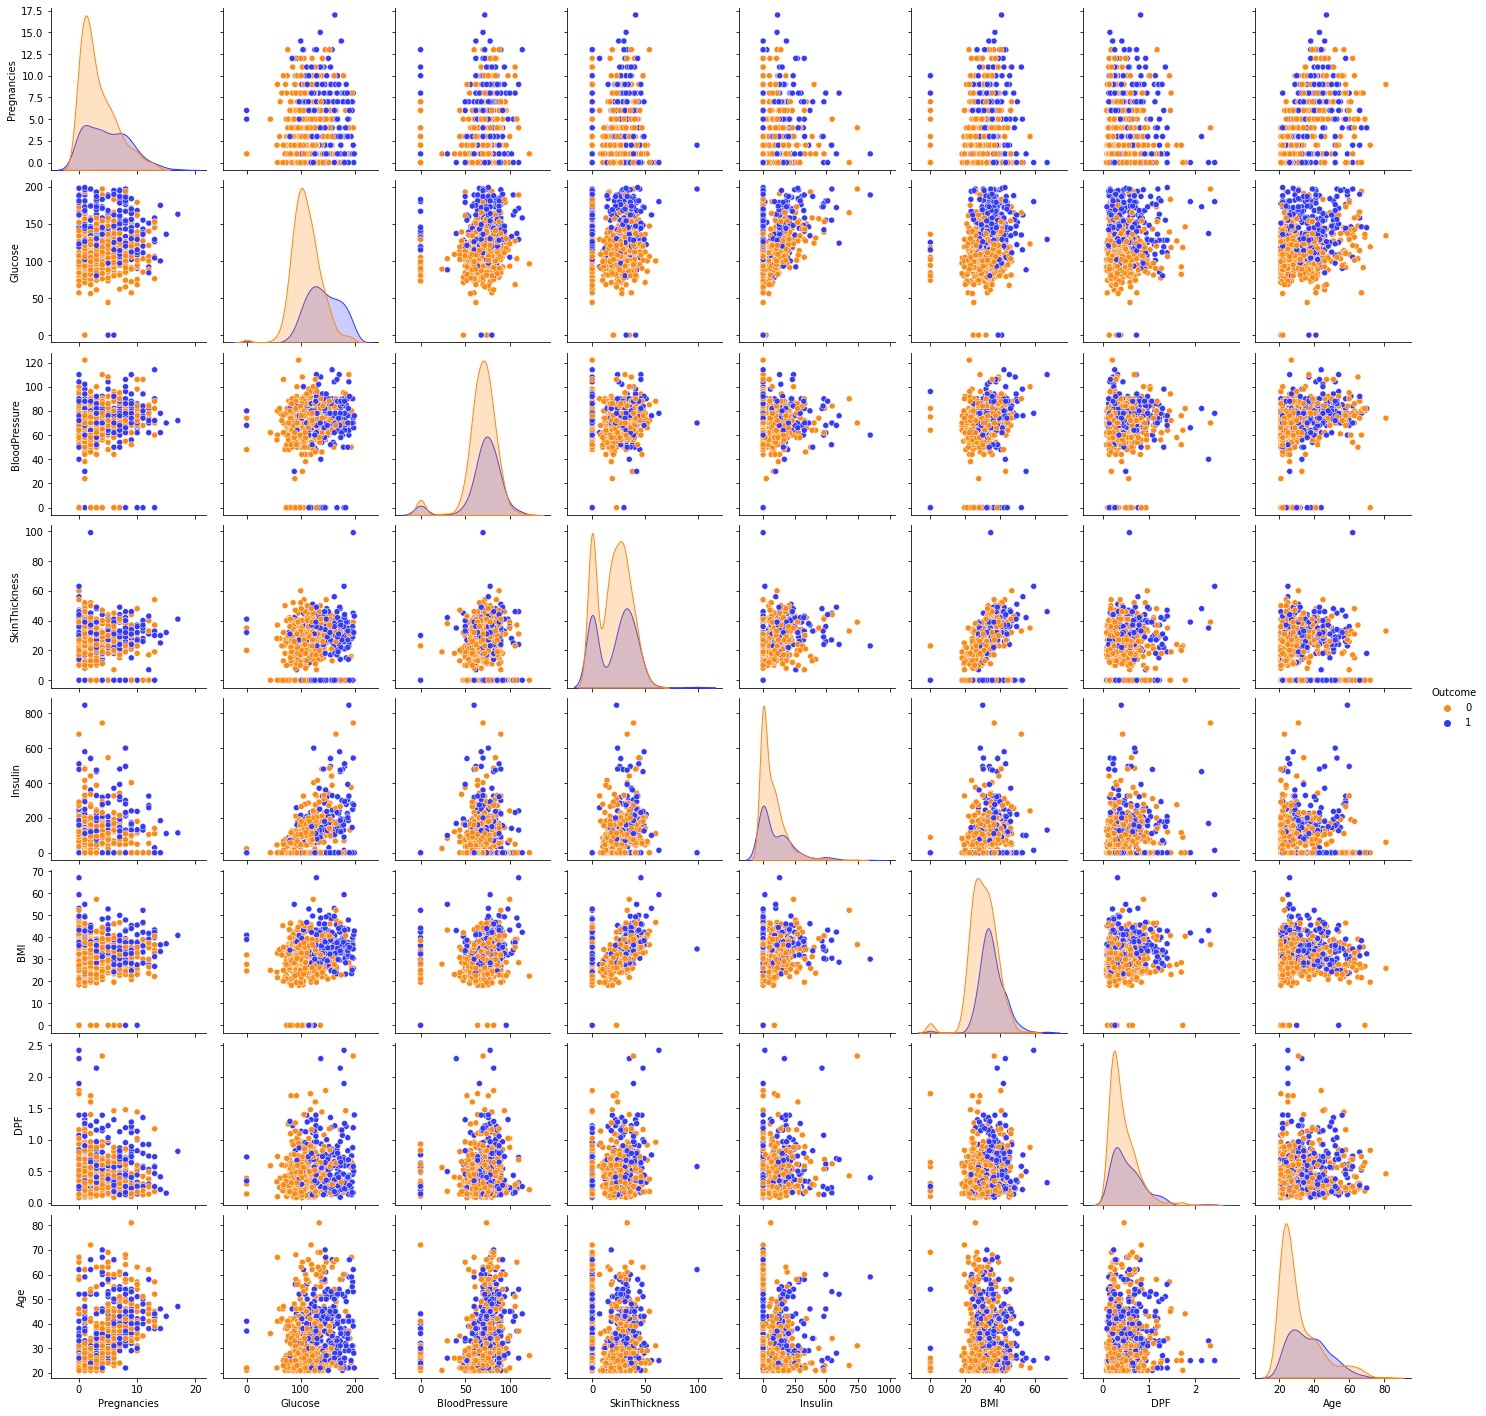

In [16]:
sns.pairplot(df,hue='Outcome',palette = ["#ff8811","#3339FF"])
plt.show()

In [17]:
fig = px.scatter_3d(df, x='Age', y='Glucose', z='BloodPressure',
              color='Outcome',size_max=18,color_continuous_scale=["#3339FF", "#ff8811"])
fig.update_layout({"template":"plotly_dark"})
fig.show()

In [18]:
fig = px.scatter_3d(df, x='Glucose', y='Insulin', z='DPF',
              color='Outcome',size_max=18,color_continuous_scale=["#3339FF", "#ff8811"])
fig.update_layout({"template":"plotly_dark"})
fig.show()

In [19]:
print(f"Shape of dataset: {colored(df.shape, 'yellow')}")

Shape of dataset: (768, 9)


In [20]:
df.drop(df[df["Pregnancies"] > 14].index,inplace=True)
df.drop(df[df["Glucose"] < 50].index,inplace=True)
df.drop(df[df["BloodPressure"] > 120].index,inplace=True)
df.drop(df[df["SkinThickness"] > 80].index,inplace=True)
df.drop(df[df["Insulin"] > 600].index,inplace=True)
df.drop(df[df["BMI"] > 55].index,inplace=True)
df.drop(df[df["DPF"] > 2].index,inplace=True)
df.drop(df[df["Age"] > 70].index,inplace=True)

print(f"Shape of dataset: {colored(df.shape, 'yellow')}")

Shape of dataset: (748, 9)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

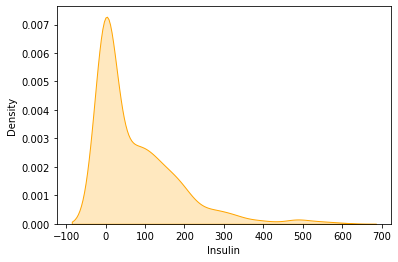

In [21]:
sns.kdeplot(df['Insulin'],color='Orange',fill=True)

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

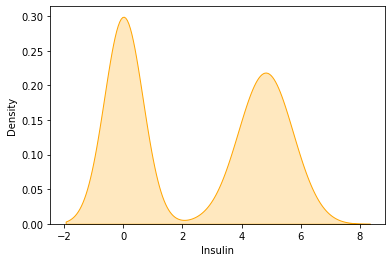

In [22]:
df['Insulin'] = df['Insulin'].map(lambda i : np.log(i) if i > 0 else 0)
sns.kdeplot(df['Insulin'],color='Orange',fill=True)

In [23]:
# importing the scaler
from sklearn.preprocessing import StandardScaler

# creating a copy of dataframe
df1 = df
col_cols = list(df1.columns)

# removing the target variable from the columns list
col_cols.pop() 

# separating the features and target 
X = df1.drop(['Outcome'],axis=1)
y = df1[['Outcome']]

# instantiating the scaler
scaler = StandardScaler()
X[col_cols] = scaler.fit_transform(X[col_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,0.647754,0.890166,0.154896,0.949692,-1.001853,0.230109,0.539169,1.463086
1,-0.856032,-1.203162,-0.158104,0.565119,-1.001853,-0.684805,-0.363408,-0.183784
2,1.249268,2.053127,-0.262437,-1.293648,-1.001853,-1.116121,0.686328,-0.097106
3,-0.856032,-1.070252,-0.158104,0.180547,0.855003,-0.488752,-0.965126,-1.050558
5,0.346997,-0.173111,0.259229,-1.293648,-1.001853,-0.815507,-0.853939,-0.270461


In [24]:
# Train test split
from sklearn.model_selection import train_test_split

# Base Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Ensembling and Boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyper-parameter tuning
from skopt import gp_minimize
from skopt import space
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)
print(f"The shape of X_train is      {colored(X_train.shape,'yellow')}")
print(f"The shape of X_test is       {colored(X_test.shape,'yellow')}")
print(f"The shape of y_train is      {colored(y_train.shape,'yellow')}")
print(f"The shape of y_test is       {colored(y_test.shape,'yellow')}")

The shape of X_train is      (598, 8)
The shape of X_test is       (150, 8)
The shape of y_train is      (598, 1)
The shape of y_test is       (150, 1)


In [26]:
models = [
    ('SVC', SVC()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('KNeighborsClassifier',KNeighborsClassifier()),
    ('LogisticRegression',LogisticRegression()),
    ('RandomForestClassifier',RandomForestClassifier()),
    ('AdaBoostClassifier',AdaBoostClassifier()),
    ('GradientBoostingClassifier',GradientBoostingClassifier())
]

print("The accuracy scores of the models are :")
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{colored(model_name,'blue')}")
    print(f"{colored(accuracy_score(y_test,y_pred), 'yellow')}\n")

The accuracy scores of the models are :
SVC
0.7933333333333333

DecisionTreeClassifier
0.72

KNeighborsClassifier
0.7

LogisticRegression
0.7866666666666666

RandomForestClassifier
0.8133333333333334

AdaBoostClassifier
0.7733333333333333

GradientBoostingClassifier
0.78

